### The Titanic dataset
Source: https://www.kaggle.com/francksylla/titanic-machine-learning-from-disaster

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic_df = pd.read_csv('datasets/titanic_train.csv')
titanic_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
265,266,0,2,"Reeves, Mr. David",male,36.0,0,0,C.A. 17248,10.5000,NaN,S
808,809,0,2,"Meyer, Mr. August",male,39.0,0,0,248723,13.0000,NaN,S
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S
739,740,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C


In [3]:
titanic_df.shape

(891, 12)

In [4]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
807,0,3,female,18.0,0,0,7.7750,S
402,0,3,female,21.0,1,0,9.8250,S
758,0,3,male,34.0,0,0,8.0500,S
519,0,3,male,32.0,0,0,7.8958,S
25,1,3,female,38.0,1,5,31.3875,S
326,0,3,male,61.0,0,0,6.2375,S
543,1,2,male,32.0,1,0,26.0000,S
165,1,3,male,9.0,0,2,20.5250,S
612,1,3,female,NaN,1,0,15.5000,Q
106,1,3,female,21.0,0,0,7.6500,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [25]:
titanic_df.isnull().sum() # Columnm

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [27]:
titanic_df.dropna(inplace=True)

In [28]:
titanic_df.shape

(712, 8)

In [29]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
titanic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,712.0,0.404494,0.491139,0.00,0.00,0.00000,1.0,1.0000
Pclass,712.0,2.240169,0.836854,1.00,1.00,2.00000,3.0,3.0000
Age,712.0,29.642093,14.492933,0.42,20.00,28.00000,38.0,80.0000
SibSp,712.0,0.514045,0.930692,0.00,0.00,0.00000,1.0,5.0000
Parch,712.0,0.432584,0.854181,0.00,0.00,0.00000,1.0,6.0000
Fare,712.0,34.567251,52.938648,0.00,8.05,15.64585,33.0,512.3292


In [69]:
titanic_df_corr = titanic_df.corr()
titanic_df_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


In [48]:
pd.crosstab(titanic_df['Survived'],titanic_df['Pclass'])

Pclass,1,2,3
Survived,,,
0,64,90,270
1,120,83,85


In [49]:
pd.crosstab(titanic_df['Survived'],titanic_df['Embarked'])

Embarked,C,Q,S
Survived,,,
0,51,20,353
1,79,8,201


In [50]:
pd.crosstab(titanic_df['Survived'],titanic_df['Sex'])

Sex,female,male
Survived,,
0,64,360
1,195,93


### Visualizing relationships

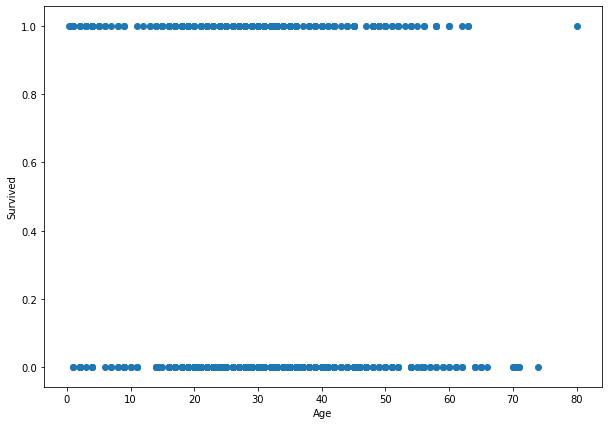

In [67]:
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(titanic_df['Age'], titanic_df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

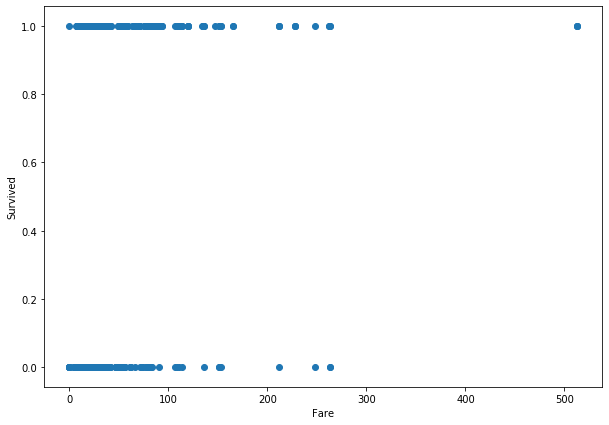

In [68]:
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(titanic_df['Fare'], titanic_df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.show()

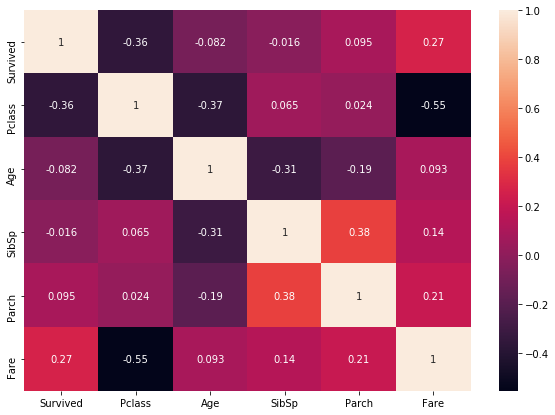

In [70]:
fig, ax = plt.subplots(figsize=(10,7))
import seaborn as sns
sns.heatmap(titanic_df_corr, annot=True)

In [71]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'].astype(str))

In [80]:
le.classes_

array(['female', 'male'], dtype=object)

In [78]:
# C = Cherbourg, Q = Queenstown, S = Southampton
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [82]:
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,3,0,63.0,0,0,9.5875,0,0,1
1,0,3,1,26.0,2,0,8.6625,0,0,1
2,1,1,0,50.0,0,1,247.5208,1,0,0
3,1,1,1,48.0,1,0,52.0000,0,0,1
4,1,1,0,39.0,1,1,83.1583,1,0,0


In [86]:
titanic_df.to_csv('datasets/titanic_processed.csv', index=False)

In [87]:
ls datasets

 Volume in drive C is Windows
 Volume Serial Number is 2A82-BEAC

 Directory of C:\Users\pankaj\00_python_codes\Pluralsight\MachineLearningPractise\BuildingClassificationModels\datasets

21-04-2020  18:17    <DIR>          .
21-04-2020  18:17    <DIR>          ..
21-04-2020  11:42       133,047,193 fashion-mnist_train.csv
21-04-2020  18:17            20,044 titanic_processed
21-04-2020  18:17            20,044 titanic_processed.csv
21-04-2020  11:41            61,194 titanic_train.csv
               4 File(s)    133,148,475 bytes
               2 Dir(s)  666,500,681,728 bytes free
